In [17]:
# This notebook is a tutorial about how to extract data and metadata from NetCDF files|

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import netCDF4 as nc4            # to work with netCDFs

In [19]:
start_date = '2014-02-17' 
end_date = '2018-06-03'

## Print out NetCDF file

In [20]:
ws='Coweeta'
data_dir  = r"g:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\CHOSEN" #os.getcwd()
ncdf = nc4.Dataset(os.path.join(data_dir, f"{ws}_NetCDF.nc"), 'r')

In [5]:
for v in ncdf.variables:
    print(ncdf.variables[v])

<class 'netCDF4._netCDF4.Variable'>
float64 Datetime(Dim_Datetime)
    range: ['2000-02-26', '2018-10-31']
unlimited dimensions: 
current shape = (6823,)
filling off
<class 'netCDF4._netCDF4.Variable'>
vlen Grid(Dim_Grid)
    Latitude: ['39.15', '', '33.89655', '35.04826', '35.11535', '35.32116', '35.18539', '35.067189', '35.0734', '35.181048', '35.24270', '35.22737', '35.16331', '35.14298', '35.824828', '', '35.069427', '35.054105', '35.069255', '', '35.051459', '35.06131400', '35.067855', '35.056714', '35.068576', '35.0506480', '35.0593010', '35.065818', '35.058029', '35.065977', '35.0493880', '35.0578120', '', '35.667943', '35.667198', '35.666348']
    Longitude: ['-83.37972', '', '-83.362289', '-83.45428', '-83.46619', '-83.79736', '-83.62215', '-83.384413', '-83.16843', '-83.385019', '-83.33727', '-83.45130', '-83.36320', '-83.48930', '-82.555420', '', '-83.437335', '-83.423798', '-83.440717', '', '-83.462251', '-83.47058383', '-83.436667', '-83.426877', '-83.440269', '-83.4606291

In [6]:
start_time = pd.to_datetime(ncdf.variables['Datetime'][:][0])
end_time = pd.to_datetime(ncdf.variables['Datetime'][:][-1])
time_index = pd.date_range(start_time, end_time, freq='D')
time_index
len(time_index)

6823

## Read discharge data

In [7]:
ncdf.variables['Discharge']

<class 'netCDF4._netCDF4.Variable'>
float64 Discharge(Dim_Datetime, Dim_Discharge_Grid)
    names: ['Prentiss_Discharge', 'Coweeta_Discharge']
    time: ['2000-02-26', '2018-10-31']
    units: L/s
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=3033
unlimited dimensions: 
current shape = (6823, 2)
filling off

In [8]:
q_flag = ncdf.variables['Discharge_Flag'][:, 1]

In [43]:
station_name = ncdf.variables['Discharge'].names[1]

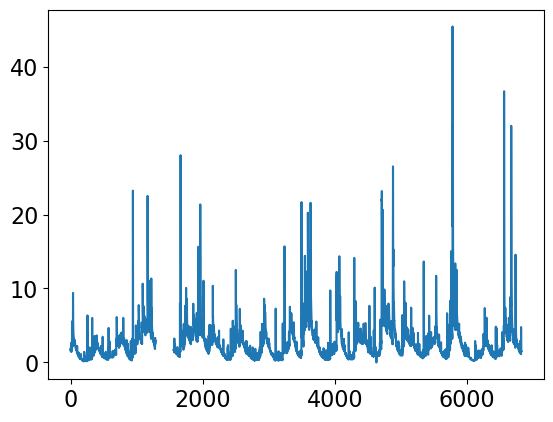

In [44]:
# TODO: convert the unit from L/s to mm/d
_q = ncdf.variables['Discharge'][:][:, 1] # Get Coweeta discharge
# https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-cwt&identifier=3033
drainage_area = 124800 # 12.48ha
conversion_l_to_m3 = 0.001
consersion_m_to_mm = 1000
coversion_sec_to_day = 86400
_q = _q / drainage_area * conversion_l_to_m3 * consersion_m_to_mm #m/s
q = _q * coversion_sec_to_day #mm/d
plt.plot(q)

# Read temperature data

In [45]:
ncdf.variables['AirTemperature']

<class 'netCDF4._netCDF4.Variable'>
float64 AirTemperature(Dim_Datetime, Dim_AirTemperature_Grid)
    names: ['Whitehall_AirTemperature', 'CoweetaMid_AirTemperature', 'LowerJonesCreek_AirTemperature', 'GrahamCounty_AirTemperature', 'WineSpring_AirTemperature', 'TessenteeFarm_AirTemperature', 'Cullasaja_AirTemperature', 'FranklinCentral_AirTemperature', 'FranklinNE_AirTemperature', 'FranklinNW_AirTemperature', 'FranklinSE_AirTemperature', 'FranklinSW_AirTemperature', 'MHOpen_AirTemperature']
    time: ['2004-11-02', '2018-10-31']
    units: Degree celsius
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://cowe

6823

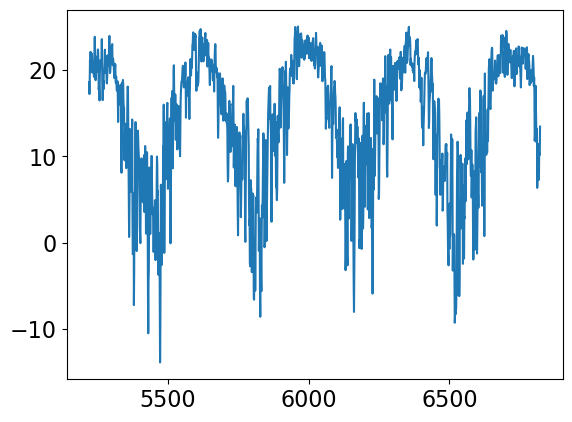

In [46]:
temp = ncdf.variables['AirTemperature'][:][:, 1]
plt.plot(temp)
len(temp)

# Read precip data

In [47]:
ncdf.variables['Precipitation']

<class 'netCDF4._netCDF4.Variable'>
float64 Precipitation(Dim_Datetime, Dim_Precipitation_Grid)
    names: ['Whitehall_Precipitation', 'CoweetaMid_Precipitation', 'LowerJonesCreek_Precipitation', 'GrahamCounty_Precipitation', 'WineSpring_Precipitation', 'TessenteeFarm_Precipitation', 'Cullasaja_Precipitation', 'FranklinCentral_Precipitation', 'FranklinNE_Precipitation', 'FranklinNW_Precipitation', 'FranklinSE_Precipitation', 'FranklinSW_Precipitation', 'MHOpen_Precipitation']
    time: ['2013-04-09', '2018-10-31']
    units: mm/d
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://coweeta.uga.edu/dbpublic/data

6823

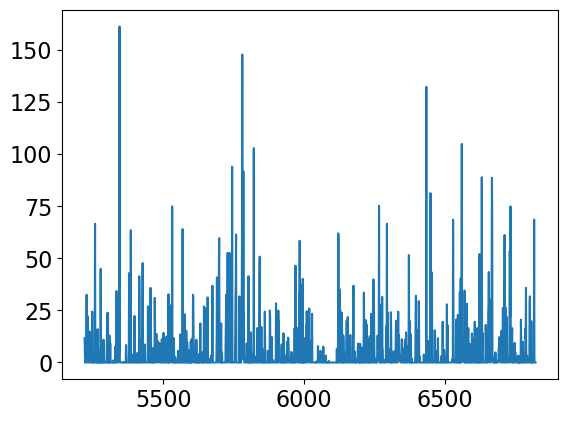

In [48]:
p = ncdf.variables['Precipitation'][:][:, 1]
plt.plot(p)
len(p)

# Read PET related data

In [49]:
ncdf.variables['SolarRadiation']

<class 'netCDF4._netCDF4.Variable'>
float64 SolarRadiation(Dim_Datetime, Dim_SolarRadiation_Grid)
    names: ['FranklinCentral_SolarRadiation', 'FranklinNE_SolarRadiation', 'FranklinNW_SolarRadiation', 'FranklinSW_SolarRadiation']
    time: ['2014-02-17', '2018-06-03']
    units: W/m2
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1039 (1039)
unlimited dimensions: 
current shape = (6823, 4)
filling off

In [50]:
R_s = ncdf.variables['SolarRadiation'][:][:, 0]
len(R_s)

6823

In [51]:
ncdf.variables['RelativeHumidity']

<class 'netCDF4._netCDF4.Variable'>
float64 RelativeHumidity(Dim_Datetime, Dim_RelativeHumidity_Grid)
    names: ['Whitehall_RelativeHumidity', 'CoweetaMid_RelativeHumidity', 'LowerJonesCreek_RelativeHumidity', 'GrahamCounty_RelativeHumidity', 'WineSpring_RelativeHumidity', 'TessenteeFarm_RelativeHumidity', 'Cullasaja_RelativeHumidity', 'FranklinCentral_RelativeHumidity', 'FranklinNE_RelativeHumidity', 'FranklinNW_RelativeHumidity', 'FranklinSE_RelativeHumidity', 'FranklinSW_RelativeHumidity', 'MHOpen_RelativeHumidity']
    time: ['2004-11-02', '2018-10-31']
    units: %
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (410

In [52]:
RH = ncdf.variables['SolarRadiation'][:][:, 1]

In [53]:
ncdf.variables['WindSpeed']

<class 'netCDF4._netCDF4.Variable'>
float64 WindSpeed(Dim_Datetime, Dim_WindSpeed_Grid)
    names: ['Whitehall_WindSpeed', 'CoweetaMid_WindSpeed', 'LowerJonesCreek_WindSpeed', 'GrahamCounty_WindSpeed', 'WineSpring_WindSpeed', 'TessenteeFarm_WindSpeed', 'Cullasaja_WindSpeed', 'FranklinCentral_WindSpeed', 'FranklinNE_WindSpeed', 'FranklinNW_WindSpeed', 'FranklinSE_WindSpeed', 'FranklinSW_WindSpeed', 'MHOpen_WindSpeed']
    time: ['2013-04-09', '2018-10-31']
    units: m/s
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4038 (OpenSite)', 'http://coweeta.u

In [54]:
U_z = ncdf.variables['WindSpeed'][:][:, 1]

In [55]:
ncdf.variables['VaporPressure']

<class 'netCDF4._netCDF4.Variable'>
float64 VaporPressure(Dim_Datetime, Dim_VaporPressure_Grid)
    names: 1039_VaporPressure
    time: ['2000-02-26', '2008-01-01']
    units: kPa
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1039 (1039)
unlimited dimensions: 
current shape = (6823, 1)
filling off

In [56]:
e_a = ncdf.variables['VaporPressure'][:][:,0]
e_a.shape

(6823,)

# Calculate EVAP

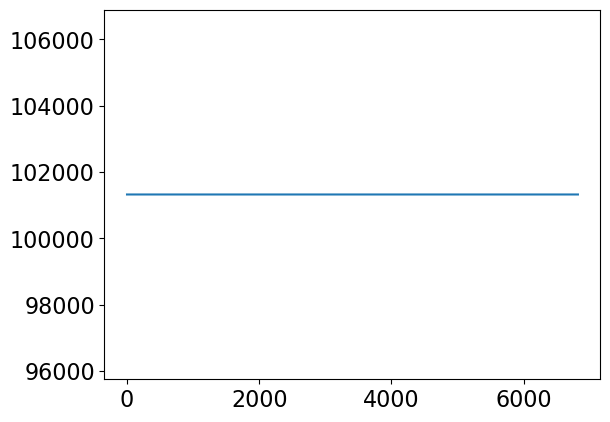

In [57]:
pressure = np.full_like(p, 101325) #Pa
plt.plot(pressure)

In [58]:
pressure
"""

To find the pressure at a specific elevation, you can use the barometric formula if you're considering the atmosphere to be standard. However, for a quick estimate, you can use the following empirical formula:

P=P0×(1−L×hT0)g×MR×LP=P0​×(1−T0​L×h​)R×Lg×M​

Where:

    PP is the pressure at elevation hh
    P0=101325 PaP0​=101325Pa is the standard pressure at sea level
    L=0.0065 K/mL=0.0065K/m is the standard temperature lapse rate
    h=782 mh=782m is the elevation
    T0=288.15 KT0​=288.15K is the standard temperature at sea level
    g=9.80665 m/s2g=9.80665m/s2 is the standard gravity
    M=0.0289644 kg/molM=0.0289644kg/mol is the molar mass of Earth's air
    R=8.31447 J/(mol K)R=8.31447J/(mol K) is the ideal gas constant

Substitute the known values into the equation:

P=101325×(1−0.0065×782288.15)9.80665×0.02896448.31447×0.0065P=101325×(1−288.150.0065×782​)8.31447×0.00659.80665×0.0289644​

Calculate the pressure PP:

P≈101325×(1−0.0176)5.255P≈101325×(1−0.0176)5.255

P≈101325×(0.9824)5.255P≈101325×(0.9824)5.255

P≈101325×0.8355P≈101325×0.8355

P≈84674.13 PaP≈84674.13Pa

So, the approximate pressure at an elevation of 782 meters is 84674.13 Pa84674.13Pa or 84.67 kPa84.67kPa.
"""

"\n\nTo find the pressure at a specific elevation, you can use the barometric formula if you're considering the atmosphere to be standard. However, for a quick estimate, you can use the following empirical formula:\n\nP=P0×(1−L×hT0)g×MR×LP=P0\u200b×(1−T0\u200bL×h\u200b)R×Lg×M\u200b\n\nWhere:\n\n    PP is the pressure at elevation hh\n    P0=101325\u2009PaP0\u200b=101325Pa is the standard pressure at sea level\n    L=0.0065\u2009K/mL=0.0065K/m is the standard temperature lapse rate\n    h=782\u2009mh=782m is the elevation\n    T0=288.15\u2009KT0\u200b=288.15K is the standard temperature at sea level\n    g=9.80665\u2009m/s2g=9.80665m/s2 is the standard gravity\n    M=0.0289644\u2009kg/molM=0.0289644kg/mol is the molar mass of Earth's air\n    R=8.31447\u2009J/(mol K)R=8.31447J/(mol K) is the ideal gas constant\n\nSubstitute the known values into the equation:\n\nP=101325×(1−0.0065×782288.15)9.80665×0.02896448.31447×0.0065P=101325×(1−288.150.0065×782\u200b)8.31447×0.00659.80665×0.0289644

## Unit conversion
Check https://eto.readthedocs.io/en/latest/package_references.html#parameter-estimation

In [59]:
# Pressure 
conversion_to_kilo = 0.001
pressure_kpa = pressure * conversion_to_kilo

# Radiation W/m2 -> MJ/m2
# 1 W/m2 = 0.0864 MJ/m2/day
conversion_Wm2_to_MJm2 = 0.0864 
R_s_MJm2 = R_s * conversion_Wm2_to_MJm2

# vapor pressure (kPa)
# no conversion

# Wind speed (m/s)
# no conversion

# Relative humidity (%) -> (-)
RH_fraction = RH / 100

# Check the period when the data is available

In [60]:
# Need df[["date", "R_s", "P", "T_mean", "e_a", "RH_mean", "U_z"]]
forcings = np.vstack([pressure_kpa, temp, temp, R_s_MJm2, e_a, RH_fraction, U_z]).transpose()
forcings_df = pd.DataFrame(forcings, index=time_index, columns=["P", "T_min", "T_max", "R_s", "e_a", "RH_mean", "U_z"])
forcings_df["date"] = pd.to_datetime(forcings_df.index)
forcings_df.head()

,P,T_min,T_max,R_s,e_a,RH_mean,U_z,date
2000-02-26,101.325,NaN,NaN,NaN,1.030000,NaN,NaN,2000-02-26
2000-02-27,101.325,NaN,NaN,NaN,1.180417,NaN,NaN,2000-02-27
2000-02-28,101.325,NaN,NaN,NaN,0.607083,NaN,NaN,2000-02-28
2000-02-29,101.325,NaN,NaN,NaN,0.546667,NaN,NaN,2000-02-29
2000-03-01,101.325,NaN,NaN,NaN,0.813750,NaN,NaN,2000-03-01


<AxesSubplot:>

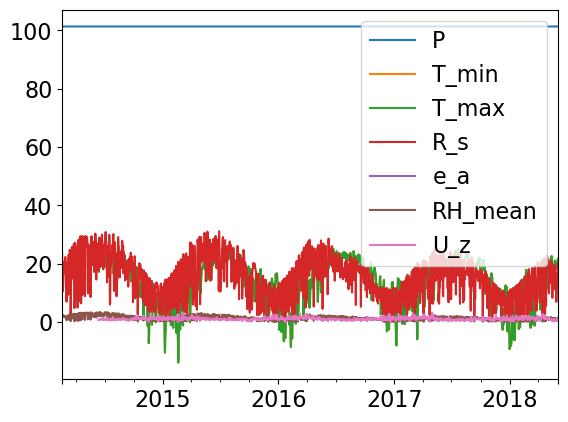

In [61]:
forcings_df[["P","T_min","T_max","R_s","e_a","RH_mean","U_z"]][start_date:end_date].plot()

In [62]:
os.getcwd()

'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\0_data_preprocessing\\script'

In [73]:
input_df = forcings_df[["P","T_min","T_max","R_s","RH_mean","U_z", "date"]][start_date:end_date].dropna().copy()
input_df.head()

,P,T_min,T_max,R_s,RH_mean,U_z,date
2014-06-12,101.325,18.600000,18.600000,19.600992,2.457335,0.682727,2014-06-12
2014-06-13,101.325,17.209583,17.209583,17.607564,1.948462,0.674167,2014-06-13
2014-06-14,101.325,18.522917,18.522917,27.943020,3.339267,0.779167,2014-06-14
2014-06-15,101.325,21.141250,21.141250,28.964196,3.043151,1.016667,2014-06-15
2014-06-16,101.325,20.353333,20.353333,18.914076,2.117113,0.792083,2014-06-16


In [74]:
import sys
sys.path.append(r'G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\libs\cfe_py')
from fao_pet import FAO_PET
fao_pet = FAO_PET(lat=35.05, lon=-83.43, elevation=726,forcing=input_df)
fao_pet.input_forcing.head()

,P,T_min,T_max,R_s,RH_mean,U_z,date,e_s,e_a
time,,,,,,,,,
2014-06-12,101.325,18.600000,18.600000,19.600992,2.457335,0.682727,2014-06-12,2.143855,5.268168
2014-06-13,101.325,17.209583,17.209583,17.607564,1.948462,0.674167,2014-06-13,1.964259,3.827284
2014-06-14,101.325,18.522917,18.522917,27.943020,3.339267,0.779167,2014-06-14,2.133534,7.124440
2014-06-15,101.325,21.141250,21.141250,28.964196,3.043151,1.016667,2014-06-15,2.509487,7.636747
2014-06-16,101.325,20.353333,20.353333,18.914076,2.117113,0.792083,2014-06-16,2.390699,5.061381


c:\Users\flipl\miniconda3\envs\CFE\lib\site-packages\eto\param_est.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ts_param['e_a'].loc[self.ts_param['e_a'].isnull()] = (self.ts_param['e_min'][self.ts_param['e_a'].isnull()] * self.ts_param.loc[self.ts_param['e_a'].isnull(), 'RH_max']/100 + self.ts_param['e_max'][self.ts_param['e_a'].isnull()] * self.ts_param.loc[self.ts_param['e_a'].isnull(), 'RH_min']/100)/2
c:\Users\flipl\miniconda3\envs\CFE\lib\site-packages\eto\param_est.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ts_param['e_a'].loc[self.ts_param['e_a'].isnull()] = self.ts_param.loc[self.t

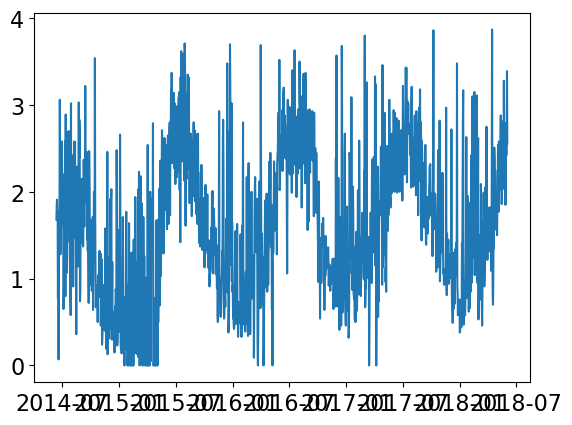

In [75]:
pet = fao_pet.calc_PET()
# Convert to mm/day
plt.plot(pet)

In [76]:
_DailyPET = forcings_df.merge(pet, left_index= True, right_index=True, how='outer')

In [96]:
DailyPET = _DailyPET.ETo_FAO_mm.resample('D').asfreq().fillna(-9999)
DailyPET.head()

2000-02-26   -9999.0
2000-02-27   -9999.0
2000-02-28   -9999.0
2000-02-29   -9999.0
2000-03-01   -9999.0
Freq: D, Name: ETo_FAO_mm, dtype: float64

# Esimate PET from temp

In [79]:
# ptq_df['TAIR'].plot()

In [80]:
# # Annual PET
# annual_PET = 1200  # in mm

# ptq_df['TAIR_positive'] = ptq_df['TAIR'][ptq_df['TAIR'] > 0]
# # Calculate the weights for each day
# total_temperature = ptq_df['TAIR_positive'].sum()
# ptq_df['Weight'] = ptq_df['TAIR_positive'] / total_temperature * 4.5

# # Calculate daily PET so that the sum of daily PET is equal to annual PET
# ptq_df['Daily_PET'] = ptq_df['Weight'] * annual_PET

# # Validate that the sum of daily PETs equals to annual PET
# assert round(ptq_df['Daily_PET'].sum()) == annual_PET  * 4.5 # This should not raise an Assertion Error

# # Print the DataFrame to inspect the daily PET values
# print(ptq_df.head())

# ptq_df.Daily_PET.plot()


# Concat all the data

In [81]:
ptq = np.vstack([p, temp, q]).transpose()
ptq_df = pd.DataFrame(ptq, index=time_index, columns=["P[mm/d]", "TAIR", "Q[mm/d]"])
ptq_df.head()

,P[mm/d],TAIR,Q[mm/d]
2000-02-26,NaN,NaN,1.652116
2000-02-27,NaN,NaN,1.907801
2000-02-28,NaN,NaN,1.711120
2000-02-29,NaN,NaN,1.652116
2000-03-01,NaN,NaN,1.593112


# Get TAIR monthly

In [82]:
ptq_df['DayOfYear'] = ptq_df.index.strftime('%m-%d')
TAIR_average_daily_values = ptq_df.groupby('DayOfYear')['TAIR'].mean()
TAIR_average_daily_values

DayOfYear
01-01     1.222083
01-02     2.847500
01-03     4.953021
01-04     1.307917
01-05    -1.955937
           ...    
12-27    10.164792
12-28     8.703437
12-29     7.972188
12-30     5.075625
12-31     2.388021
Name: TAIR, Length: 366, dtype: float64

# Save all the data

In [83]:
output_dir = r"C:\Program Files (x86)\HBV-light\Data\Coweeta\Data"

In [84]:
ptq_df['Date'] = ptq_df.index.strftime('%Y%m%d')
ptq_df['Date'] = ptq_df['Date'].str.replace("-", "")
ptq_df.head()

,P[mm/d],TAIR,Q[mm/d],DayOfYear,Date
2000-02-26,NaN,NaN,1.652116,02-26,20000226
2000-02-27,NaN,NaN,1.907801,02-27,20000227
2000-02-28,NaN,NaN,1.711120,02-28,20000228
2000-02-29,NaN,NaN,1.652116,02-29,20000229
2000-03-01,NaN,NaN,1.593112,03-01,20000301


In [86]:
ptq_df.fillna(-9999, inplace=True)

In [87]:
file_path = os.path.join(output_dir, "ptq.txt")

with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("Coweeta daily\n")
    # Save the DataFrame as tab-delimited data, excluding the index
ptq_df[["Date", "P[mm/d]", "TAIR", "Q[mm/d]"]][start_date:end_date].to_csv(file_path, index=None, sep='\t', mode='a')

In [88]:
DailyPET.fillna(-9999, inplace=True)

In [97]:
file_path = os.path.join(output_dir, "EVAP.txt")
with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("EVAP\n")
    # Save the DataFrame as tab-delimited data, excluding the index
DailyPET[start_date:end_date].to_csv(os.path.join(output_dir, "EVAP.txt"), header=None, index=None, mode='a')

In [100]:
TAIR_average_daily_values.to_csv(os.path.join(output_dir, "t_mean.txt"), index=None, header=None)
# output_path_daily =  r"C:\Program Files (x86)\HBV-light\Data\LittleWashita_daily\data"
# average_daily_values.to_csv(os.path.join(output_path_daily, "t_mean.txt"), index=None, header=None)

# Get soil moisture data

In [21]:
def get_data(ncdf, variable_names_lst=[]): # variable_names_lst=[] to get all the data
    # ws=watershed[watershed_number-1].split('-')[1]
    # print(ws)
    # File=ws+'_NetCDF.nc'
    # ncdf = nc4.Dataset(path +'/'+ File, 'r')
    keys_lst=list(ncdf.variables.keys())
    len_keys=len(keys_lst)
    print("Hydrometeorological variables in this watershed are:")
    all_variables=keys_lst[2:int(len_keys/2)]
    print(all_variables)
    if variable_names_lst==[]:
        for i,var in enumerate(all_variables):
            print("Reading all variables")
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, 
                                columns = [ncdf.variables[var].names])
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')
    else:
        for i,var in enumerate(variable_names_lst):
            print(f"Reading {var}")
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            
            if ncdf.variables[var][:].shape[1]==1:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = [ncdf.variables[var].names])
            else:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = ncdf.variables[var].names)
            
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')      
    former_df.index.rename('DateTime',inplace = True)
    return former_df

In [22]:
df=get_data(ncdf,["SoilMoisture"])

Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


In [23]:
df.head()

,CWT102_SoilMoisture_30cmA,CWT102_SoilMoisture_30cmB,CWT102_SoilMoisture_60cmA,CWT102_SoilMoisture_60cmB,CWT105_SoilMoisture_30cmA,CWT105_SoilMoisture_30cmB,CWT105_SoilMoisture_60cmA,CWT105_SoilMoisture_60cmB,CWT107_SoilMoisture_30cmA,CWT107_SoilMoisture_30cmB,...,BentCreek1_SoilMoisture_60cmA,BentCreek1_SoilMoisture_60cmB,BentCreek2_SoilMoisture_30cmA,BentCreek2_SoilMoisture_30cmB,BentCreek2_SoilMoisture_60cmA,BentCreek2_SoilMoisture_60cmB,BentCreek3_SoilMoisture_30cmA,BentCreek3_SoilMoisture_30cmB,BentCreek3_SoilMoisture_60cmA,BentCreek3_SoilMoisture_60cmB
DateTime,,,,,,,,,,,,,,,,,,,,,
2000-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ncdf.variables

RuntimeError: NetCDF: Not a valid ID